In [1]:
#importing the modules
from pandas_datareader import wb
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import datetime
import pydst
plt.style.use('seaborn-whitegrid')

#the code to clean up the dataframe for electricity prod from renewable energy
wb_rnwx = wb.download(indicator='EG.ELC.RNWX.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_rnwx = wb_rnwx.rename(columns = {'EG.ELC.RNWX.ZS':'elec_prod_from_renewable_energy'})
wb_rnwx = wb_rnwx.reset_index()
wb_rnwx.year = wb_rnwx.year.astype(int)
wb_rnwx.country = wb_rnwx.country.astype(str)
wb_rnwx = wb_rnwx.sort_values(['country','year']) #sorts by country and then year
wb_rnwx.dropna() #drops all the values that has no value

wb_rnwx.head(5)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


,country,year,elec_prod_from_renewable_energy
40,European Union,1975,0.558944
39,European Union,1976,0.513907
38,European Union,1977,0.519714
37,European Union,1978,0.522394
36,European Union,1979,0.507560


In [2]:
wb_nucl = wb.download(indicator='EG.ELC.NUCL.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_nucl = wb_nucl.rename(columns = {'EG.ELC.NUCL.ZS':'elec_prod_from_nuclear_energy'})
wb_nucl = wb_nucl.reset_index()
wb_nucl.year = wb_nucl.year.astype(int)
wb_nucl.country = wb_nucl.country.astype(str)
wb_nucl = wb_nucl.sort_values(['country','year'])
wb_nucl.dropna()

wb_nucl.head(5)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


,country,year,elec_prod_from_nuclear_energy
40,European Union,1975,5.654875
39,European Union,1976,6.064906
38,European Union,1977,7.241884
37,European Union,1978,8.233095
36,European Union,1979,8.863022


In [3]:
import ipywidgets as widgets
def plot_wb(wb_nucl, country): 
    I = wb_nucl['country'] == country
    ax=wb_nucl.loc[I,:].plot(x='year', y='elec_prod_from_nuclear_energy', style='-o', legend=False)
    ax.set_ylabel('% of total')

In [4]:
widgets.interact(plot_wb, 
    wb_nucl = widgets.fixed(wb_nucl),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_nucl.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

In [5]:
import ipywidgets as widgets
def plot_wb(wb_rnwx, country): 
    I = wb_rnwx['country'] == country
    ax = wb_rnwx.loc[I,:].plot(x='year', y='elec_prod_from_renewable_energy', style='-o', legend=False)
    ax.set_ylabel('% of total')

In [6]:
widgets.interact(plot_wb, 
    wb_rnwx = widgets.fixed(wb_rnwx),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_rnwx.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

In [7]:
wb_nucl.copy()
wb_rnwx.copy()
wb = pd.merge(wb_nucl, wb_rnwx, on=['country', 'year'], how='left')
wb.rename(columns={'elec_prod_from_nuclear_energy':'e'}, inplace=True)
wb.rename(columns={'elec_prod_from_renewable_energy':'r'}, inplace=True)

In [8]:
wb['prod_diff'] = wb.e - wb.r
wb

,country,year,e,r,prod_diff
0,European Union,1975,5.654875,0.558944,5.095931
1,European Union,1976,6.064906,0.513907,5.550999
2,European Union,1977,7.241884,0.519714,6.722170
3,European Union,1978,8.233095,0.522394,7.710701
4,European Union,1979,8.863022,0.507560,8.355462
...,...,...,...,...,...
159,Sub-Saharan Africa (excluding high income),2011,3.038803,0.670913,2.367890
160,Sub-Saharan Africa (excluding high income),2012,2.682724,0.730265,1.952459
161,Sub-Saharan Africa (excluding high income),2013,3.104398,0.856317,2.248080
162,Sub-Saharan Africa (excluding high income),2014,2.963829,1.701720,1.262109


In [9]:
import ipywidgets as widgets
def plot_wb(wb, country): 
    I = wb['country'] == country
    ax = wb.loc[I,:].plot(x='year', y='prod_diff', style='-o', legend=False)
    ax.set_ylabel('%-point difference of total production')

In [10]:
widgets.interact(plot_wb, 
    wb = widgets.fixed(wb),
    country = widgets.Dropdown(description='Country', 
                                    options=wb.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

In [11]:
from pandas_datareader import wb
wb_rnwx_kwh = wb.download(indicator='EG.ELC.RNWX.KH', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
#wb_rnwx_kwh = wb_rnwx_kwh.rename(columns = {'EG.ELC.RNWX.KH':'elec_prod_from_renewable_energy_in_kwh'})
wb_rnwx_kwh = wb_rnwx_kwh.reset_index()
wb_rnwx_kwh.year = wb_rnwx_kwh.year.astype(int)
wb_rnwx_kwh.country = wb_rnwx_kwh.country.astype('string')
wb_rnwx_kwh = wb_rnwx_kwh.sort_values(['country','year'])
wb_rnwx_kwh.dropna()
wb_rnwx_kwh.rename(columns={'EG.ELC.RNWX.KH':'e_in_kwh'}, inplace=True)
wb_rnwx_kwh['e_in_kwh_thousand'] = wb_rnwx_kwh['e_in_kwh']/1000000

wb_rnwx_kwh.head(5)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


,country,year,e_in_kwh,e_in_kwh_thousand
40,European Union,1975,7765000000,7765.0
39,European Union,1976,7796000000,7796.0
38,European Union,1977,8136000000,8136.0
37,European Union,1978,8628000000,8628.0
36,European Union,1979,8725000000,8725.0


In [12]:
wb_rnwx_kwh_ = wb_rnwx_kwh.copy()

wb_rnwx_kwh_mean = wb_rnwx_kwh_.groupby('country')['e_in_kwh_thousand'].agg('mean') # spliting and apllying in one swoop

wb_rnwx_kwh_mean.name = 'wb_rnwx_kwh_mean'
wb_rnwx_kwh_ = wb_rnwx_kwh_.set_index('country').join(wb_rnwx_kwh_mean, how='left') # combining
wb_rnwx_kwh_['demean'] = wb_rnwx_kwh_.e_in_kwh_thousand - wb_rnwx_kwh_.wb_rnwx_kwh_mean
wb_rnwx_kwh_.xs('European Union')

,year,e_in_kwh,e_in_kwh_thousand,wb_rnwx_kwh_mean,demean
country,,,,,
European Union,1975,7765000000,7765.0,102836.707317,-95071.707317
European Union,1976,7796000000,7796.0,102836.707317,-95040.707317
European Union,1977,8136000000,8136.0,102836.707317,-94700.707317
European Union,1978,8628000000,8628.0,102836.707317,-94208.707317
European Union,1979,8725000000,8725.0,102836.707317,-94111.707317
European Union,1980,10855000000,10855.0,102836.707317,-91981.707317
European Union,1981,10991000000,10991.0,102836.707317,-91845.707317
European Union,1982,9894000000,9894.0,102836.707317,-92942.707317
European Union,1983,10324000000,10324.0,102836.707317,-92512.707317


(1975.0, 2015.0)

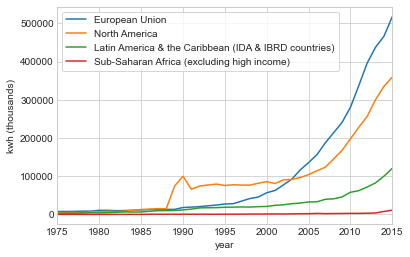

In [13]:
regions = ['European Union','North America','Latin America & the Caribbean (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for i in regions:
    wb_rnwx_kwh_.xs(i).plot(x='year',y='e_in_kwh_thousand',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('kwh (thousands)')
ax.set_xlim(1975, 2015)

(1975.0, 2015.0)

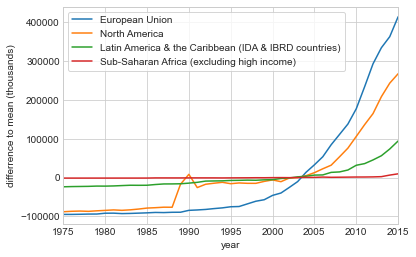

In [14]:
regions = ['European Union','North America','Latin America & the Caribbean (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for i in regions:
    wb_rnwx_kwh_.xs(i).plot(x='year',y='demean',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('differrence to mean (thousands)')
ax.set_xlim(1975, 2015)